# Heart Disease Prediction.

The following uses dataset named Heart Disease UCI which can be found in Kaggle datasets or UCI archives follwing the link https://archive.ics.uci.edu/ml/datasets/Heart+Disease


This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient.

Dataset Creators: 
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='once')

In [2]:
heart=pd.read_csv('heart.csv')

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.shape

(303, 14)

# Data Analysis

The data we have has only 303 entries and 14 attributes.

Data contains: 

-  age - age in years
-  sex - (1 = male; 0 = female) 
-  cp - chest pain type 
-  trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
-  chol - serum cholestoral in mg/dl 
-  fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
-  restecg - resting electrocardiographic results 
-  thalach - maximum heart rate achieved 
-  exang - exercise induced angina (1 = yes; 0 = no) 
-  oldpeak - ST depression induced by exercise relative to rest 
-  slope - the slope of the peak exercise ST segment 
-  ca - number of major vessels (0-3) colored by flourosopy 
-  thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
-  target - have disease or not (1=yes, 0=no)


### Check for null values

In [5]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We dont have any null values

## Age

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <a list of 10 Patch objects>)

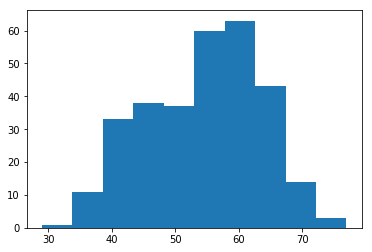

In [6]:
plt.hist(heart['age'])

We can see that all the people are above 30 and most of the people are in the age of 50 to 70 years.

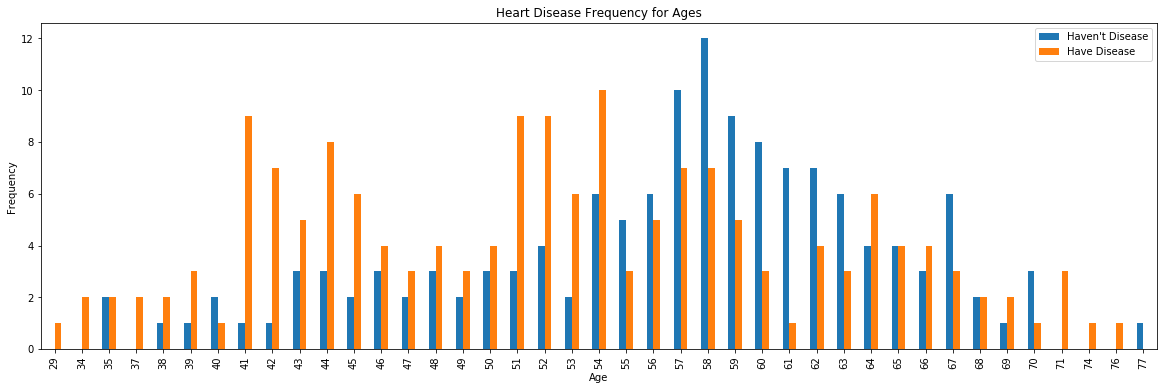

In [7]:
pd.crosstab(heart.age,heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

Majority of people below 55 years have heart disease when compared to people above 55 years.Which is interesting considering the assumption that older people have higher chances of disease.

## Sex

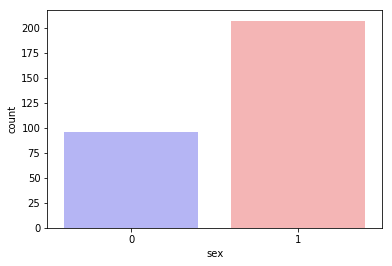

In [8]:
sns.countplot(heart['sex'],palette='bwr')

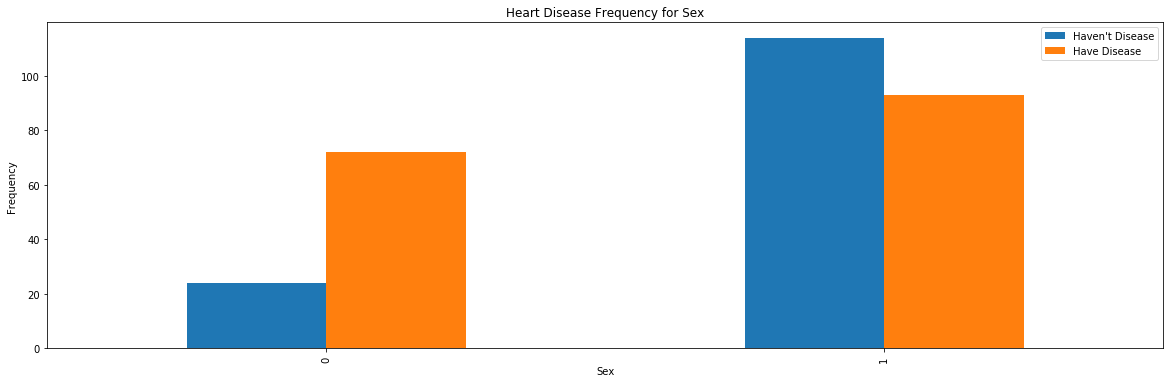

In [9]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

We see that our dataset contains more male than female and female are more prone to disease than male

## Target

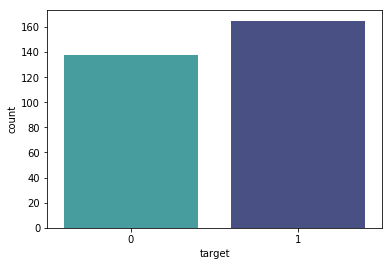

In [10]:
sns.countplot(heart.target, palette='mako_r')

Our dataset contains people having disease a little more(20 more) than without disease but i would still say its a decent distribution

## Chol

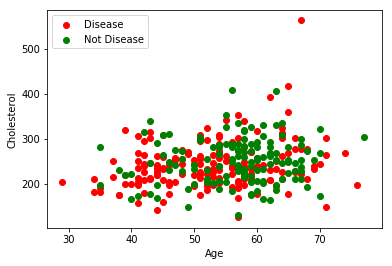

In [11]:
plt.scatter(x=heart.age[heart.target==1], y=heart.chol[(heart.target==1)], c="red")
plt.scatter(x=heart.age[heart.target==0], y=heart.chol[(heart.target==0)],c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

From this graph we see that people under age group 50-55 years seem to have more cholesterol than other and may be this explains why more people under age 50 have disease than others

## Thalach

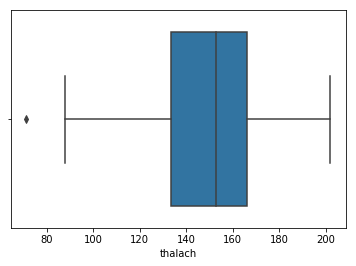

In [12]:
sns.boxplot(heart.thalach)

In [13]:
heart.loc[heart['thalach']<80]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


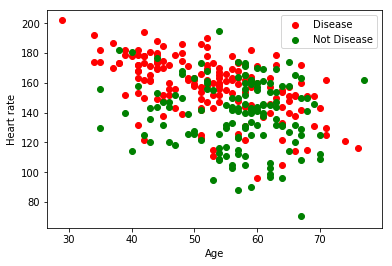

In [14]:
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="red")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)],c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Heart rate")
plt.show()

 - It is evident that people with abnormally high heart rates tend to have heart disease and also we see most people of age groups less than 50 years tend to have higher heart rate because of the fact of higher cholesterol resulting in more people with high heart diseases
 - In the above boxplot we see an outlier below the minimum which actually has a heart rate of 71.A heart rate of 71 is normal healthy person heart rate hence this is not a outlier and a valid entry.

## RestECG

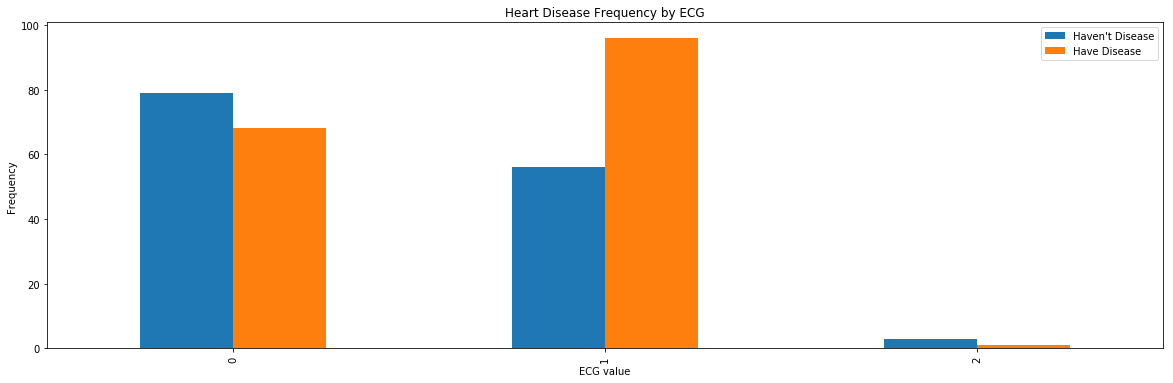

In [15]:
pd.crosstab(heart.restecg,heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency by ECG')
plt.xlabel('ECG value')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

Although we dont exactly know what corresponding values of ECG refer to be can say that having ECG value of 1 is harmful than 0 and 2.

## ExAng

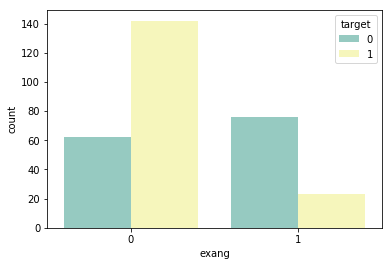

In [16]:
sns.countplot(heart.exang,hue=heart.target,palette='Set3')

We see that exercise induced anigna is not the main cause of heart disease rather than a common chest pain due to over-exercise.

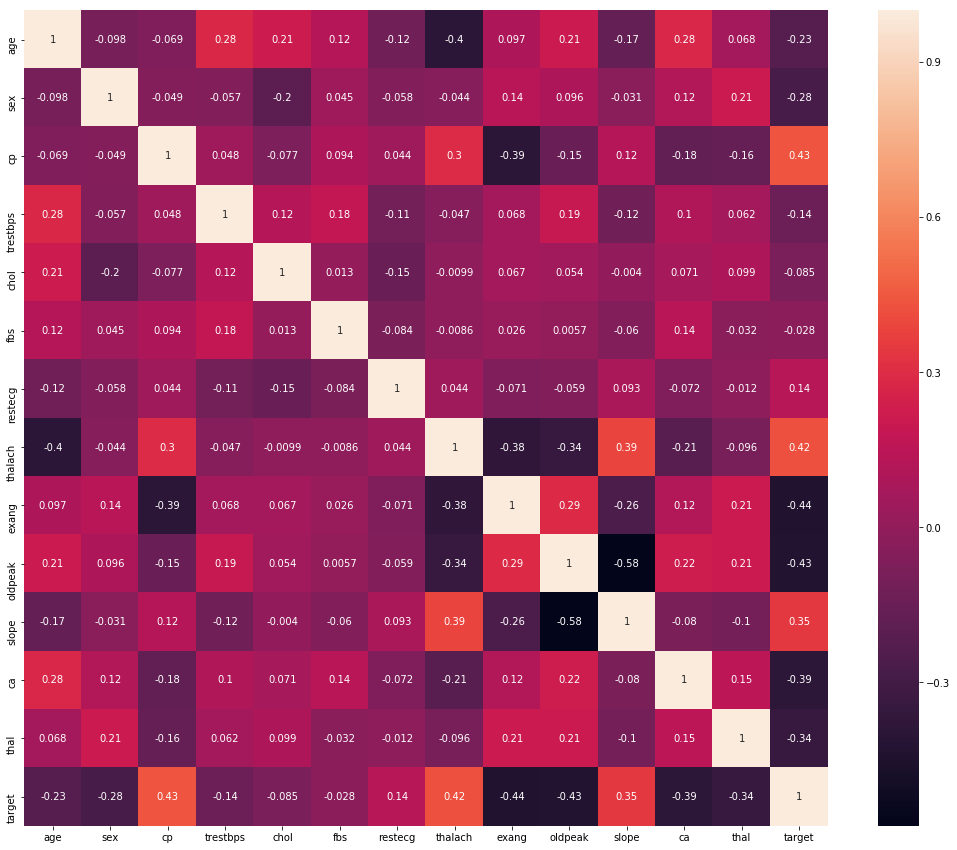

In [17]:
plt.figure(figsize=(18, 15))
sns.heatmap(heart.corr(),annot=True)

Having Disease is highly correlated with having chest pain and max heart rate achieved.

# Pre-Processing

Since this is a small dataset we will use classifiers like logistic regression, xgboost etc and most of these will work well on catergorical variables rather than continous variables.

In [18]:
target=heart['target']
heart.drop('target',inplace=True,axis=1)

In [19]:
cont_cols=['age','trestbps','chol','thalach','oldpeak']
for i in cont_cols:
    heart[i]=pd.qcut(heart[i],q=4,duplicates='drop')
    heart[i],uniques=pd.factorize(heart[i])

In [20]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,1,3,0,0,1,0,0,0,0,0,0,1
1,1,1,2,1,1,0,1,1,0,0,0,0,2
2,1,0,1,1,2,0,0,1,0,1,2,0,2
3,2,1,1,2,0,0,1,1,0,2,2,0,2
4,2,0,0,2,3,0,1,2,1,2,2,0,2


we need to get dummy variables

In [21]:
dummy_col=['age','cp','trestbps','chol','restecg','thalach','thal','oldpeak','ca','slope']

In [22]:
heart=pd.get_dummies(heart,columns=dummy_col)

For each dummies we can remove one column because 3 categories can be explained by 2 attributes

In [23]:
drop_col=['age_0','cp_0','trestbps_0','chol_0','restecg_0','thalach_0','thal_0','oldpeak_0','ca_0','slope_0']
heart.drop(drop_col,axis=1,inplace=True)

In [24]:
heart.head()

,sex,fbs,exang,age_1,age_2,age_3,cp_1,cp_2,cp_3,trestbps_1,...,thal_2,thal_3,oldpeak_1,oldpeak_2,ca_1,ca_2,ca_3,ca_4,slope_1,slope_2
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


We got 31 columns which is little high dimentionality for such small data.I will be fitting model on this but we can use dimentionality reduction techniques

# Modelling

In [25]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve 
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix



/home/sai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/sai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [26]:
kfold = StratifiedKFold()

In [27]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(XGBClassifier())

/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


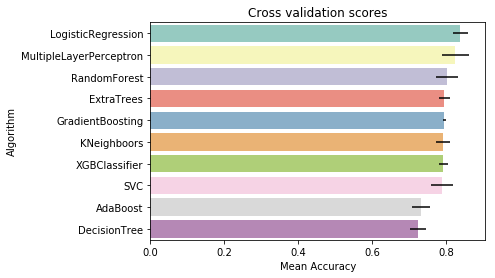

In [28]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, heart
                                      , y = target, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","XGBClassifier"]})

cv_res.sort_values(by=['CrossValMeans'],inplace=True,ascending=False)

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [29]:
cv_res.loc[cv_res['CrossValMeans']>0.80]

,CrossValMeans,CrossValerrors,Algorithm
8,0.838284,0.024697,LogisticRegression
6,0.825083,0.012349,MultipleLayerPerceptron
3,0.801980,0.014002,RandomForest


We can see that logistic Regression out performs all other classifiers. Further we can choose the best 3 or 5 performing models and perform hyperparameter tuning using GridSearchCV.